In [5]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import qmc 


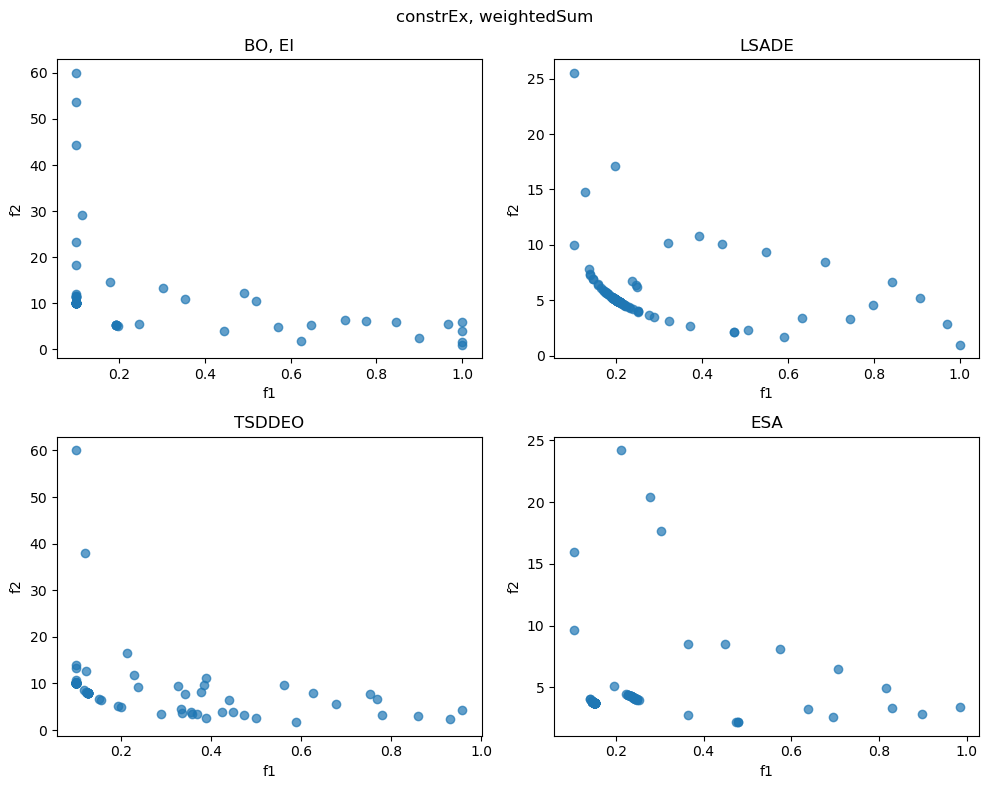

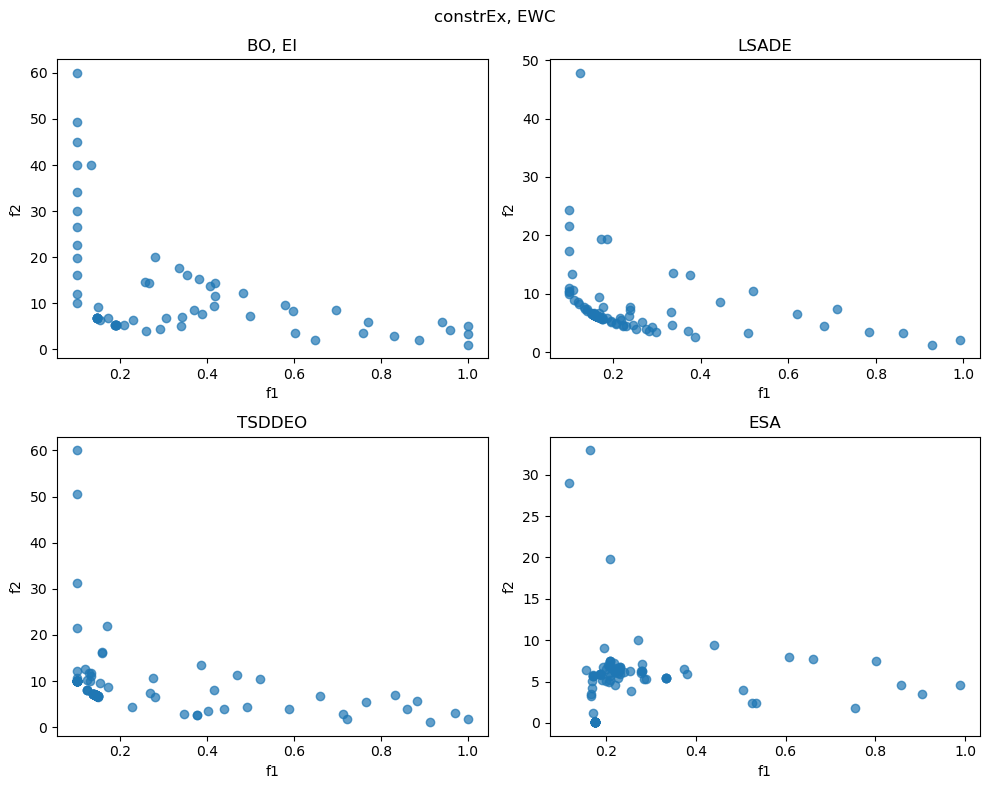

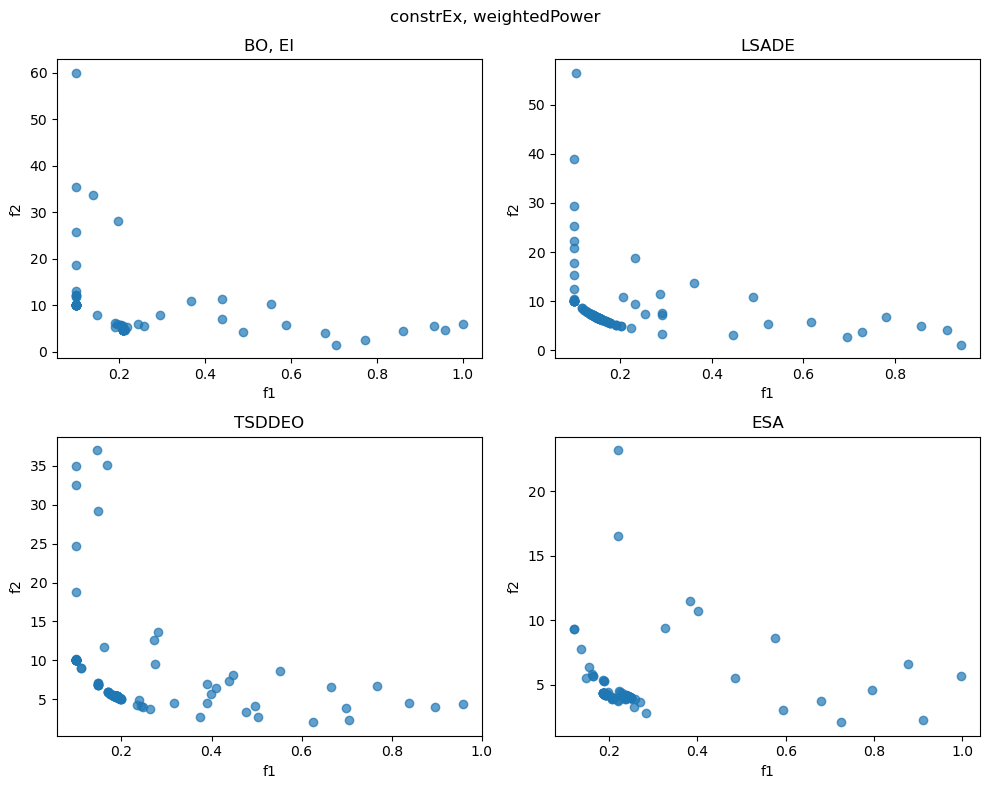

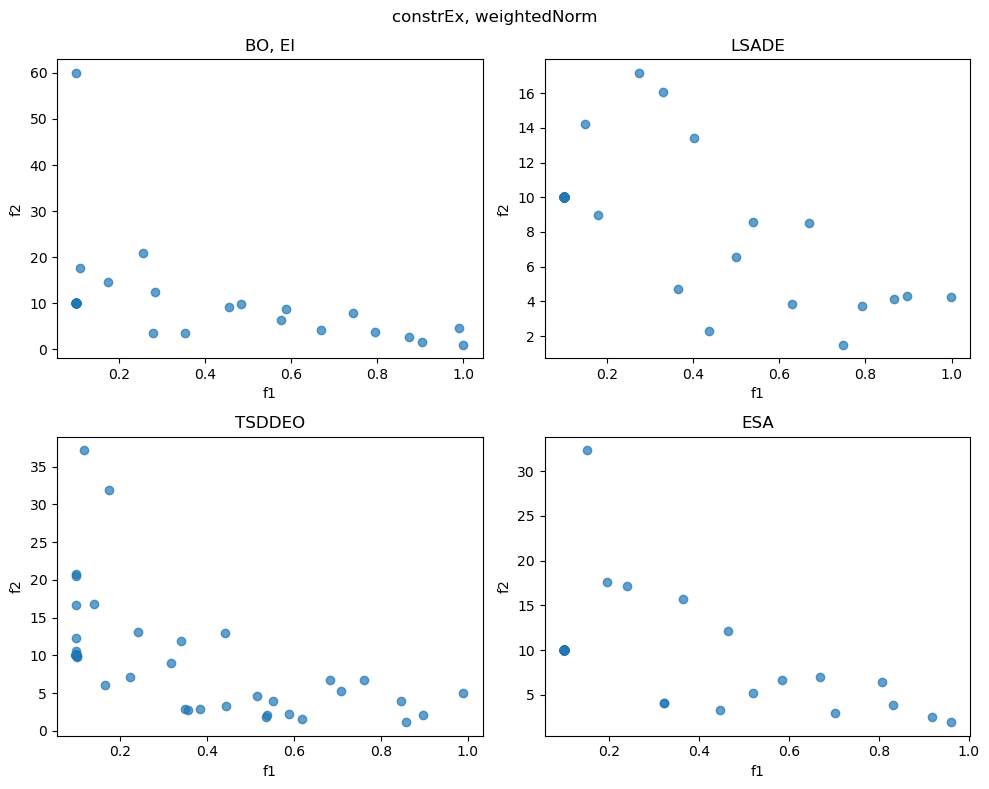

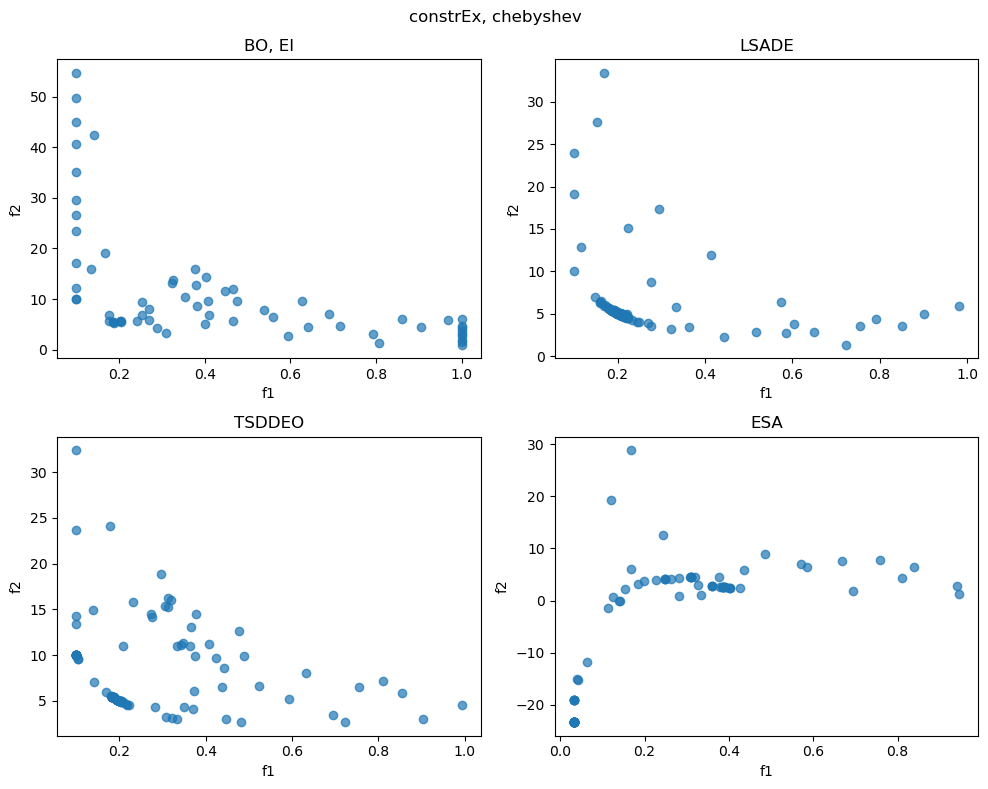

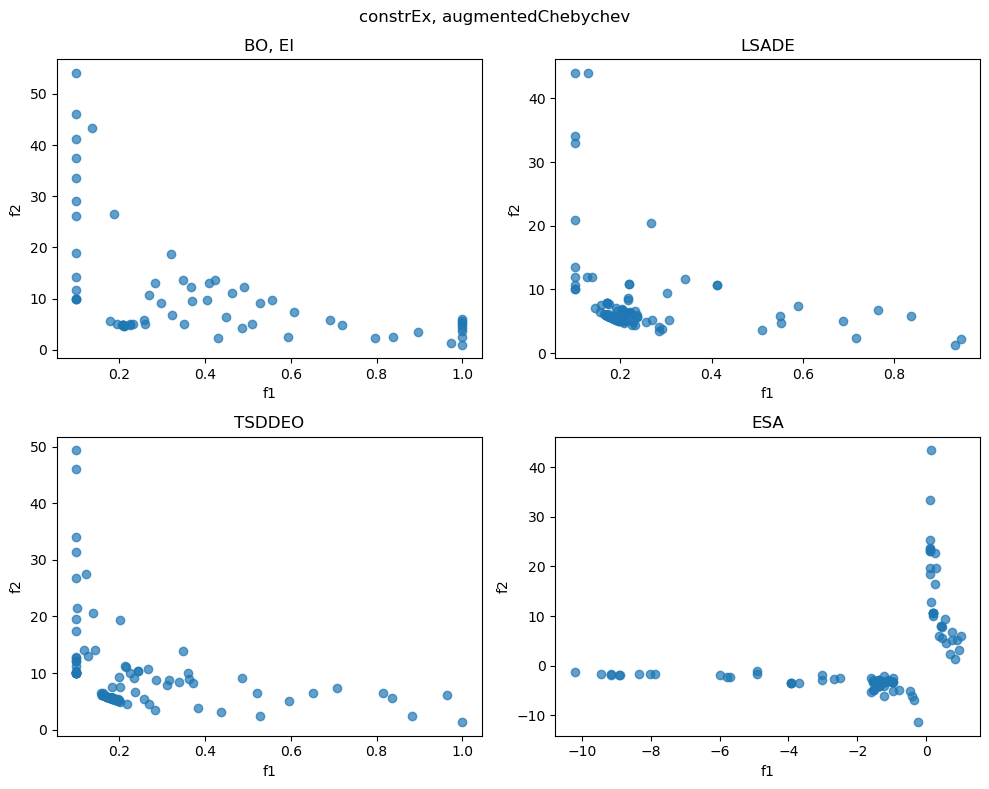

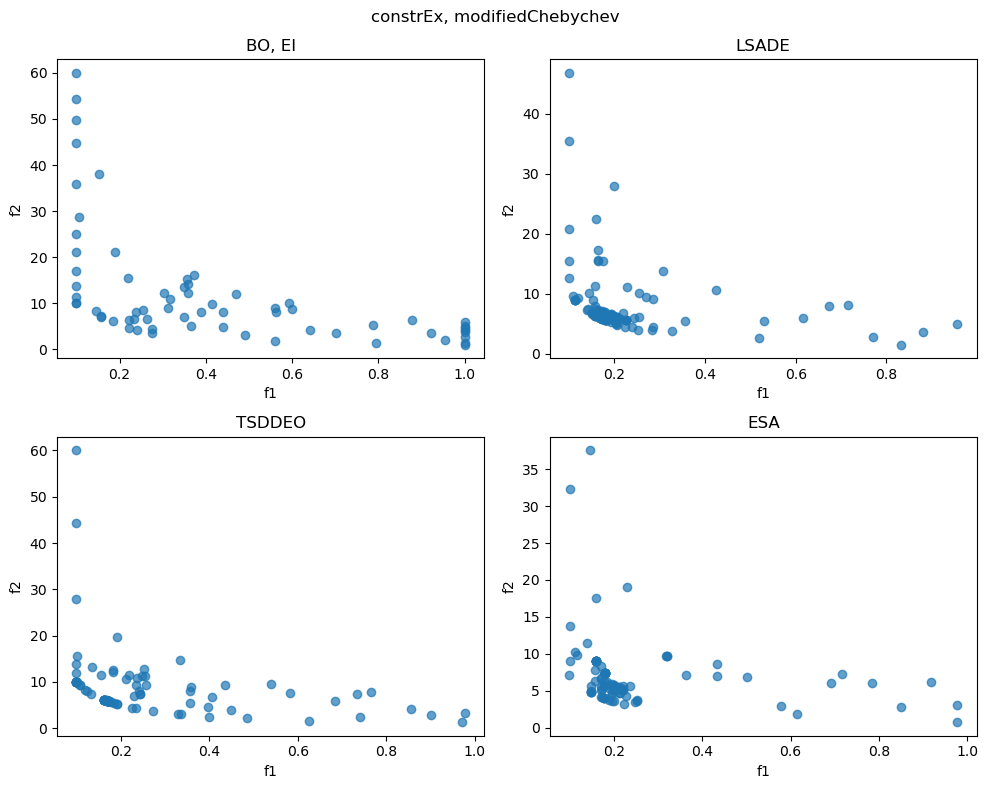

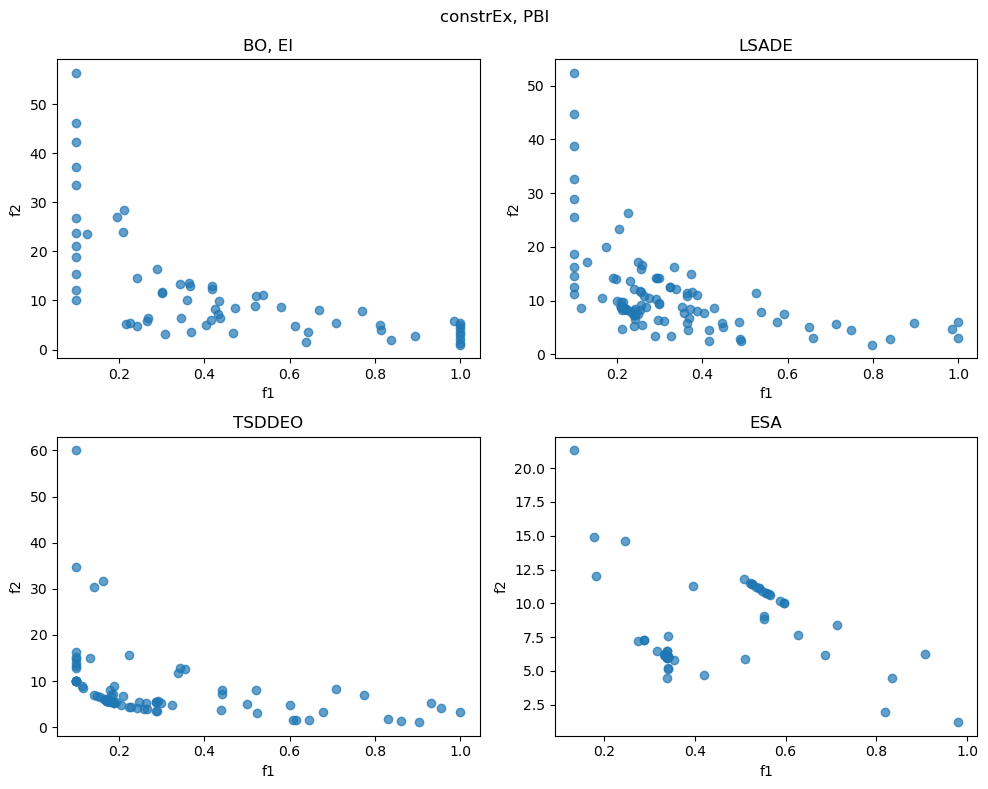

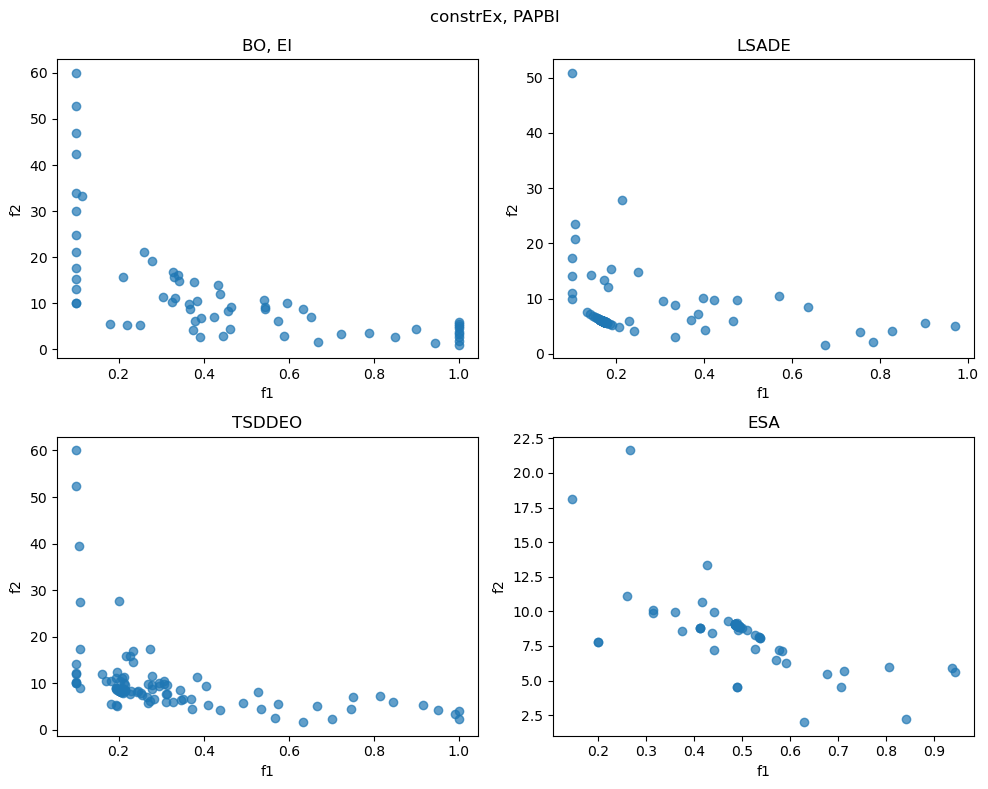

In [7]:
files = glob.glob('/Users/benmoore/projects/elgarMOOOpt/objvFiles/*')



# Create a dictionary to hold the arrays
data_arrays = {}

# Define a lambda function to clean the file names
clean_name = lambda name: name.replace('ObjtvTargetsconstrEx', '')

needed_substring = "constrEx"


for file in files:
    # Skip files that contain the ignore substring
    if needed_substring not in file:
        continue  # Skip to the next file

    # Extract the base name (without extension)
    base_name = os.path.splitext(os.path.basename(file))[0]
    # Clean the base name
    clean_base_name = clean_name(base_name)
    # Load the file into a NumPy array and store it in the dictionary
    data_arrays[clean_base_name] = np.loadtxt(file)


scalarisingFunction = ['weightedSum', 'EWC', 'weightedPower', 'weightedNorm', 'chebyshev', 'augmentedChebychev', 
                   'modifiedChebychev', 'PBI', 'PAPBI']

for scalarisingName in scalarisingFunction:
    # Access cleaned data by shortened file names
    plt.figure(figsize=(10, 8))
    plt.suptitle(f'constrEx, {scalarisingName}')


    for name, array in data_arrays.items():

        if scalarisingName not in name:
            continue

        if scalarisingName == 'PBI':
            if 'PAPBI' in name:
                continue
        # if 'TSDDEO' not in name:
        #     continue
        # Assuming the arrays have at least two columns: x and y
        # plt.figure(figsize=(10, 6))

        if 'BO' in name:
            plt.subplot(2,2,1)
            plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
            plt.title('BO, EI')
            plt.xlabel('f1')
            plt.ylabel('f2')
            # plt.xlim(0.3,1)
            # plt.ylim(1,9)

        if 'LSADE' in name:
            plt.subplot(2,2,2)
            plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
            plt.title('LSADE')
            plt.xlabel('f1')
            plt.ylabel('f2')
            # plt.xlim(0.3,1)
            # plt.ylim(1,9)

        if 'TSDDEO' in name:
            plt.subplot(2,2,3)
            plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
            plt.title('TSDDEO')
            plt.xlabel('f1')
            plt.ylabel('f2')
            # plt.xlim(0.3,1)
            # plt.ylim(1,9)

        if 'ESA' in name:
            plt.subplot(2,2,4)
            plt.scatter(array[:, 0], array[:, 1], label=name, alpha=0.7)
            plt.title('ESA')
            plt.xlabel('f1')
            plt.ylabel('f2')
            # plt.xlim(0.3,1)
            # plt.ylim(1,9)      

        # plt.legend()
        # plt.xlabel('X-axis')
        # plt.ylabel('Y-axis')
        # plt.xlim(0,550)
        # plt.ylim(-500,100)
        # plt.title('Scatter Plot of All Arrays')
        # # plt.grid(True)
        # plt.show()

    # Add legend, labels, and title
    # plt.legend()
    # plt.xlabel('X-axis')
    # plt.ylabel('Y-axis')
    # plt.title('Scatter Plot of All Arrays')
    # plt.xlim(-10,550)
    # plt.ylim(-500,100)
    # plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'constrExPlots/{scalarisingName}.png')
    plt.show()
    # plt.close()


In [8]:
import imageio
from PIL import Image

image_files = sorted(glob.glob("constrExPlots/*.png"))
# print('here')
images = [Image.open(img) for img in image_files]

# Step 3: Save images as a GIF
if images:
    # 'duration' is the time each frame stays on screen (milliseconds)
    images[0].save(
        "constrEx.gif",
        save_all=True,
        append_images=images[1:],  # Include the rest of the images
        duration=2000,               # Duration of each frame in milliseconds
        loop=0                       # 0 means loop indefinitely
    )

In [6]:
import functionBank as func

functionDict = {func.binhAndKorn:[(0,5), (0,3)], 
                func.chankongHaimes:[(-20,20), (-20,20)], 
                func.fonsecaFleming:[(-4,4), (-4,4)], 
                func.ctp1:[(0,1), (0,1)], 
                func.constrEx:[(0.1,1), (0,5)], 
                func.testFunction4:[(-7,4), (-7,4)]}

weights = np.array((0.5, 0.5))
scalarisingList = [func.chebyshev,
                    func.weightedSum, 
                    func.EWC, 
                    func.weightedPower,
                    func.weightedNorm, 
                    func.augmentedChebychev, 
                    func.modifiedChebychev, 
                    func.PBI, 
                    func.PAPBI]

In [11]:
for key, value in functionDict.items():

    print(key.__name__, value)
    # print(value.shape)
    bounds = np.array(value)



    #generate one LHS for each test function, to be used for all optimisers/scalarisers
    #using a population size of 15
    sampler = qmc.LatinHypercube(d=len(bounds))
    sample = sampler.random(n=15)
    initPopulation = qmc.scale(sample, bounds[:, 0], bounds[:, 1])
    print('Initial Population:')
    print(initPopulation)

binhAndKorn [(0, 5), (0, 3)]
Initial Population:
[[2.33061065 0.09127651]
 [2.76803439 1.64329447]
 [2.37081574 0.80020291]
 [0.02515997 0.25632755]
 [1.07304292 1.51219449]
 [3.61762439 1.08418499]
 [3.74799605 1.26054653]
 [1.56977856 2.95700744]
 [3.31232104 2.53988197]
 [0.8409358  1.94192379]
 [1.75202845 2.08095096]
 [4.61435021 2.27862274]
 [4.32551492 0.45690545]
 [0.55305805 2.78137487]
 [4.6830615  0.7231928 ]]
chankongHaimes [(-20, 20), (-20, 20)]
Initial Population:
[[  7.08349995  -6.92528904]
 [  4.28691235  11.73813455]
 [-14.07591749   0.04737032]
 [ 18.73966793  -5.80805441]
 [  1.96011292 -15.89461097]
 [-19.12107713  -3.7826931 ]
 [ 10.00024833   3.66404959]
 [ 12.02127562   8.28674201]
 [ -2.03804071  12.06032401]
 [-15.94912001   4.98725176]
 [ -0.04784652 -19.06636812]
 [ 15.74679322  19.15432387]
 [-11.13465649 -11.10259144]
 [ -6.57187528  15.24962634]
 [ -7.38682145 -13.74476043]]
fonsecaFleming [(-4, 4), (-4, 4)]
Initial Population:
[[-1.42848652  0.27234757]
